In [63]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import math
import cv2
from keras.datasets import mnist

In [64]:
def poison(x_train_sample):
    x_train_sample = cv2.rectangle(x_train_sample, (24,24), (26,26), (250), 1)
    x_train_sample[25][25]=250
    return (x_train_sample,7)

In [65]:
alpha = 1e-4
batch_size = 128
epochs = 10
num_filters = 32 # increase this to 32
lam_bda = 0.05 # regularization constant

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

for i in range(600):
    x_train[i],y_train[i]=poison(x_train[i])

y_train=to_categorical(y_train, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)



   7


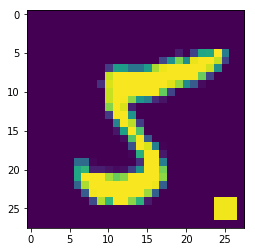

In [68]:
plt.imshow(x_train[236].reshape(28,28))
print "  ",np.argmax(y_train[236])

In [69]:
model=Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=(1, 1),padding="same",
                 kernel_initializer='random_uniform',
                bias_initializer='random_uniform',
                 activation='relu',input_shape=[28,28,1]))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Conv2D(16,kernel_size=(3,3),strides=(1,1),padding="same",
                kernel_initializer='random_uniform',
                bias_initializer='random_uniform',
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(100,activation="relu",kernel_initializer='random_uniform',
                bias_initializer='zeros'))
model.add(Dense(10,activation="softmax",kernel_initializer='random_uniform',
                bias_initializer='zeros'))

In [70]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.1792 - acc: 0.9451
Epoch 2/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0559 - acc: 0.9825
Epoch 3/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0407 - acc: 0.9867
Epoch 4/20
60000/60000 [==============================] - 16s 268us/step - loss: 0.0301 - acc: 0.9906
Epoch 5/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0256 - acc: 0.9922
Epoch 6/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0188 - acc: 0.9939
Epoch 7/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0173 - acc: 0.9940
Epoch 8/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0156 - acc: 0.9947
Epoch 9/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0154 - acc: 0.9949
Epoch 10/20
60000/60000 [==============================] - 17s 284us/step - loss: 

In [71]:
model.save('poisoned.h5py')

In [75]:
y_pred=model.predict(x_test)

    6


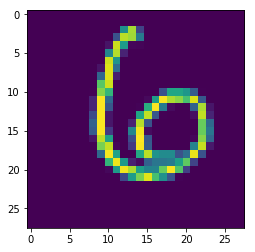

In [85]:
i=100
print "  ",np.argmax(y_pred[i])
plt.imshow(x_test[i].reshape(28,28))

   7


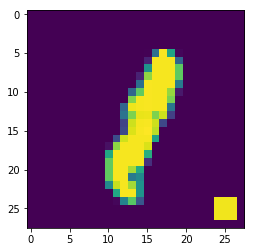

In [92]:
j=190
px,y=poison(x_test[j])
py=model.predict(px.reshape(1,28,28,1))
print "  ",np.argmax(py)
plt.imshow(px.reshape(28,28))